In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score,r2_score
from sklearn.pipeline import Pipeline

from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn. svm import SVC
import math


In [2]:
df=pd.read_csv('laptop_data.csv')

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


<Axes: xlabel='Ram', ylabel='Price'>

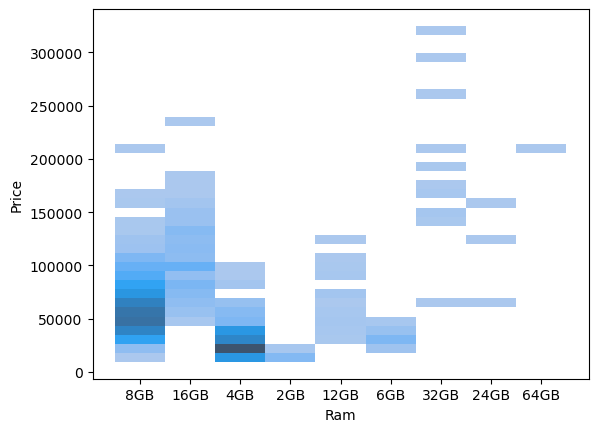

In [4]:
sns.histplot(x=df['Ram'],y=df['Price'])


In [5]:
df.sample(1)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
852,852,Dell,Notebook,17.3,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R7 M445,Linux,2.83kg,46087.2


In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df['Ram']=df['Ram'].str.replace('GB','')
df['Weight']=df['Weight'].str.replace('kg','')
df['Price']=np.floor(df['Price']).astype(int)

In [8]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
528,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,500GB HDD,AMD Radeon R5 M430,Windows 10,2.3,31168


In [9]:
df['Ram']=df['Ram'].astype('int32')
df['Weight']=df['Weight'].astype('float')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   int64  
dtypes: float64(2), int32(1), int64(1), object(7)
memory usage: 107.0+ KB


In [11]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
159,Toshiba,Notebook,15.6,1366x768,Intel Core i3 6006U 2.2GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.1,23816


In [12]:
df['price_log']=np.log1p(df['Price'])
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,price_log
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,11.175759
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,10.776787
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,10.329964
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,11.814481
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,11.473103


<Axes: xlabel='price_log', ylabel='Density'>

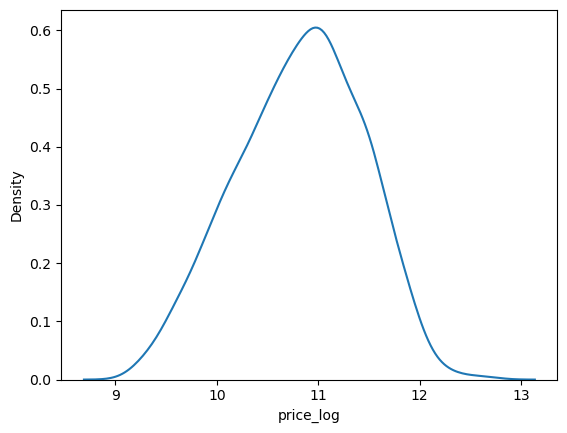

In [13]:
sns.kdeplot(x=df['price_log'])

<Axes: ylabel='Company'>

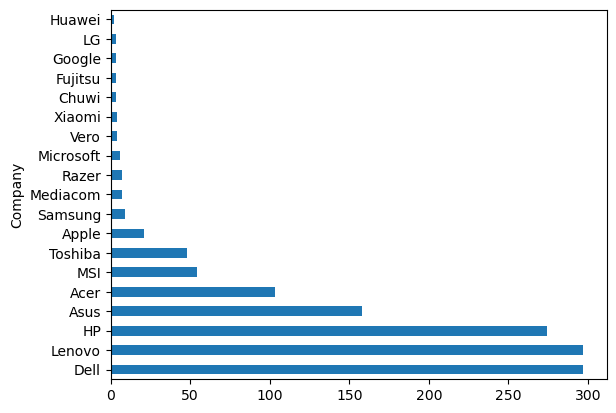

In [14]:
df['Company'].value_counts().plot(kind='barh')

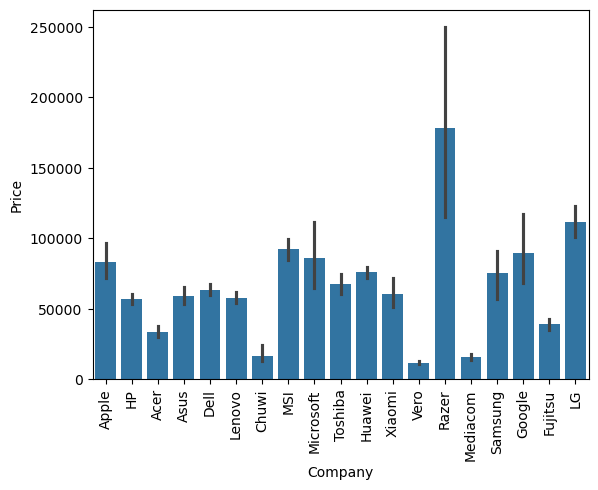

In [15]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

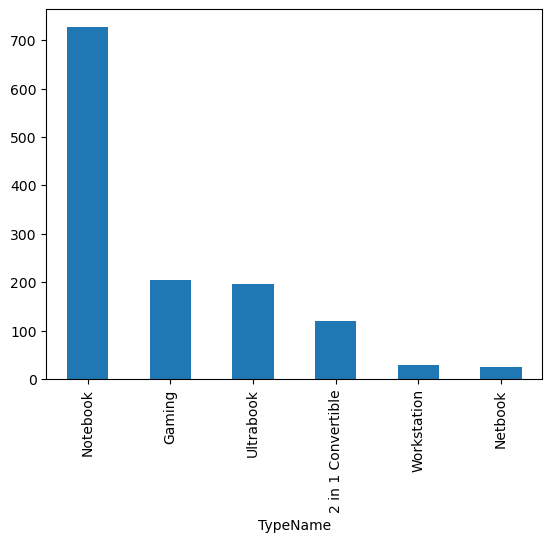

In [16]:
df['TypeName'].value_counts().plot(kind='bar')

<Axes: xlabel='Inches', ylabel='Density'>

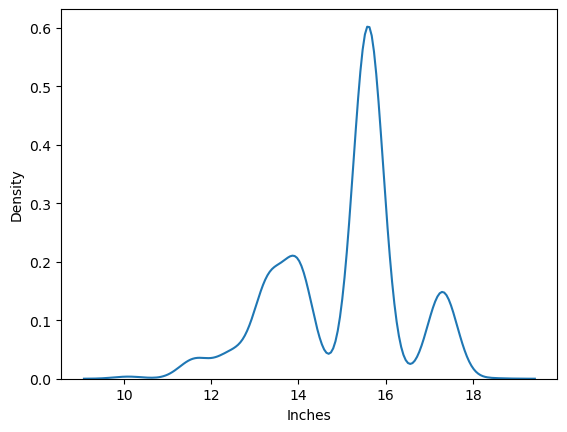

In [17]:
sns.kdeplot(df['Inches'])

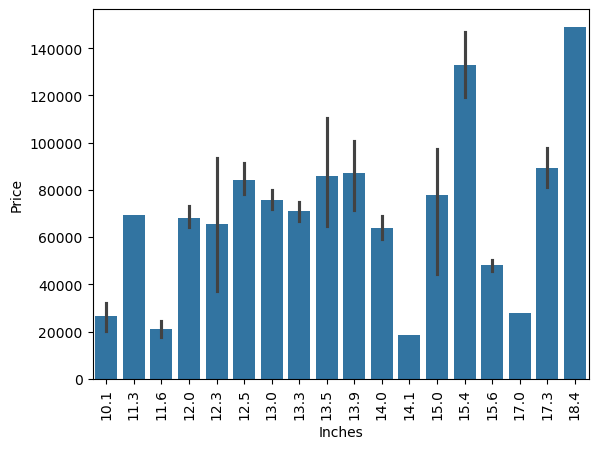

In [18]:
sns.barplot(x=df['Inches'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [19]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [20]:
df['TouchScreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [21]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,price_log,TouchScreen
955,Dell,Gaming,17.3,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.36,168045,12.031993,0
485,Lenovo,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.75,55890,10.931159,0
473,Dell,Ultrabook,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.42,98133,11.494089,1
1001,HP,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.34,63349,11.056430,0
226,Dell,Notebook,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,16,1TB HDD,AMD Radeon R7 M445,Windows 10,2.30,45768,10.731362,1


In [22]:
df['TouchScreen'].value_counts()

TouchScreen
0    1111
1     192
Name: count, dtype: int64

<Axes: xlabel='TouchScreen', ylabel='Price'>

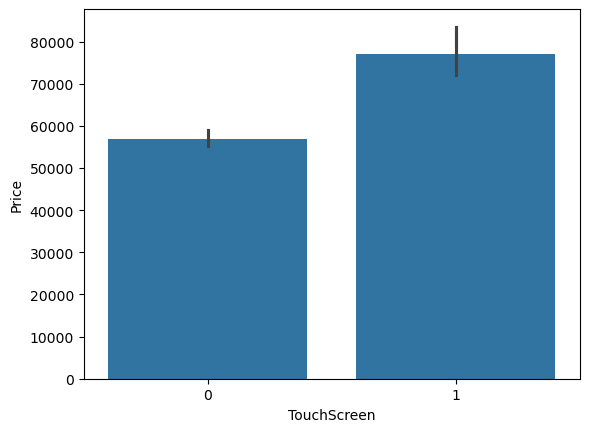

In [23]:
sns.barplot(x=df['TouchScreen'],y=df['Price'])

In [24]:
df['ips']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,price_log,TouchScreen,ips
924,Lenovo,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.37,97236,11.484907,1,1
742,Toshiba,Notebook,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.25,81784,11.311849,1,1
493,Acer,Notebook,15.6,1366x768,AMD A10-Series 9620P 2.5GHz,8,1TB HDD,AMD Radeon RX 540,Windows 10,2.20,30849,10.336892,0,0
1129,HP,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 6300HQ 2.3GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,3.35,60153,11.004663,0,1
173,Toshiba,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,2.00,26053,10.167927,0,0


In [25]:
new=df['ScreenResolution'].str.split('x',n=1,expand=True)
new

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [26]:

df['X_res'] = new[0].str.extract(r'(\d+)').astype(int)
df['Y_res']=new[1]


In [27]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,price_log,TouchScreen,ips,X_res,Y_res
165,MSI,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.40,95850,11.470550,0,1,1920,1080
1062,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,1TB HDD,Intel HD Graphics,Windows 10,2.25,29783,10.301727,0,0,1920,1080
626,Mediacom,Notebook,14.0,Full HD 1920x1080,Intel Atom x5-Z8350 1.44GHz,2,32GB Flash Storage,Intel HD Graphics,Windows 10,1.40,12733,9.452031,0,0,1920,1080
1101,Dell,Ultrabook,12.5,1366x768,Intel Core i3 6100U 2.3GHz,4,128GB SSD,Intel HD Graphics 520,Windows 7,1.50,62176,11.037740,0,0,1366,768
711,Dell,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7440HQ 2.8GHz,8,256GB SSD,Nvidia GeForce 930MX,Linux,1.64,58021,10.968578,0,0,1920,1080


In [28]:
df['Y_res']=df['Y_res'].astype(int)

In [29]:
df['X_res']


0       2560
1       1440
2       1920
3       2880
4       2560
        ... 
1298    1920
1299    3200
1300    1366
1301    1366
1302    1366
Name: X_res, Length: 1303, dtype: int64

In [30]:
df.corr(numeric_only=True)['Price']

Inches         0.068196
Ram            0.743007
Weight         0.210370
Price          1.000000
price_log      0.927582
TouchScreen    0.191226
ips            0.252207
X_res          0.083832
Y_res          0.552809
Name: Price, dtype: float64

In [31]:
df['ppi']=(((df['X_res']**2)+(df['Y_res']**2))**0.5/df['Inches']).astype(float)

In [32]:
df.corr(numeric_only=True)['Price']

Inches         0.068196
Ram            0.743007
Weight         0.210370
Price          1.000000
price_log      0.927582
TouchScreen    0.191226
ips            0.252207
X_res          0.083832
Y_res          0.552809
ppi            0.348331
Name: Price, dtype: float64

In [33]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core i5 7200U 2.70GHz        1
Intel Core M M7-6Y75 1.2GHz        1
Intel Core M 6Y54 1.1GHz           1
AMD E-Series 9000 2.2GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Name: count, Length: 118, dtype: int64

In [34]:
df.sample(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,price_log,TouchScreen,ips,X_res,Y_res,ppi
574,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,2.05,36496,10.504985,0,0,1920,1080,141.211998


In [35]:
df['cpu_name']=df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,price_log,TouchScreen,ips,X_res,Y_res,ppi,cpu_name
1283,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,38378,10.555266,0,0,1366,768,100.454670,Intel Core i7
179,HP,2 in 1 Convertible,13.3,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.29,79866,11.288118,1,1,4,2160,162.406294,Intel Core i5
845,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4,256GB SSD,AMD Radeon R5 M420,Windows 10,2.18,39373,10.580861,0,0,1920,1080,141.211998,Intel Core i7


In [36]:
# df['cpu_name'].str[-2:]

In [37]:
def find_processor(text):
    if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
        return text
    else:
        if text.split()[0]=='Intel':
            return 'Other intel processors'
        else:
            return 'AMD Processor'

In [38]:
df['cpu_brand']=df['cpu_name'].apply(find_processor)

In [39]:
df['cpu_brand'].value_counts()

cpu_brand
Intel Core i7             527
Intel Core i5             423
Other intel processors    154
Intel Core i3             136
AMD Processor              63
Name: count, dtype: int64

<Axes: xlabel='cpu_brand', ylabel='Price'>

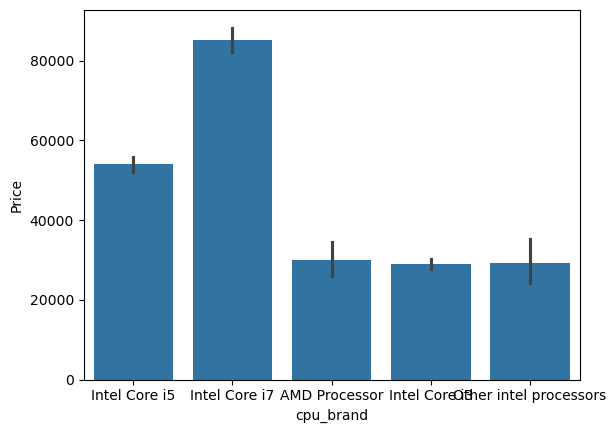

In [40]:
sns.barplot(x=df['cpu_brand'],y=df['Price'])

In [41]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,price_log,TouchScreen,ips,X_res,Y_res,ppi,cpu_name,cpu_brand
333,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,1TB HDD,Intel HD Graphics 520,Windows 10,1.85,23922,10.082596,0,0,1920,1080,141.211998,Intel Core i3,Intel Core i3


In [42]:
df.drop(columns=['cpu_name','Cpu'],inplace=True)
df.sample()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,price_log,TouchScreen,ips,X_res,Y_res,ppi,cpu_brand
1112,Lenovo,Notebook,15.6,1366x768,4,128GB SSD,Intel HD Graphics 520,Windows 10,2.1,22857,10.037056,0,0,1366,768,100.45467,Intel Core i3


In [43]:
new_gpu=df['Gpu'].str.split(' ',n=1,expand=True)
df['gpus']=new_gpu[0]
df['gpus'].value_counts()
df=df[(df['gpus']!='ARM')]
# df.sample(3)

<Axes: xlabel='gpus', ylabel='Price'>

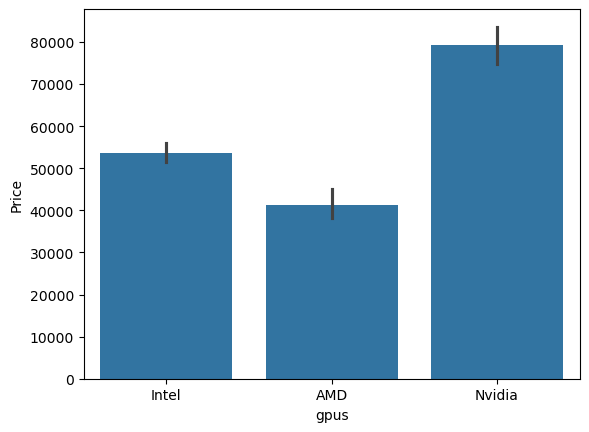

In [44]:
sns.barplot(x=df['gpus'],y=df['Price'])

In [45]:
df['Ram'].value_counts()

Ram
8     619
4     374
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: count, dtype: int64

<Axes: xlabel='Ram', ylabel='Price'>

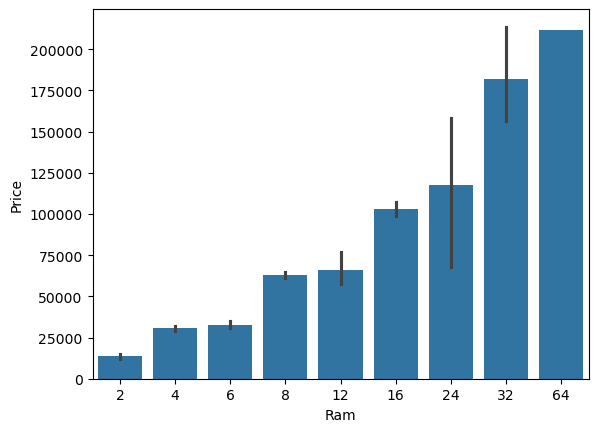

In [46]:
sns.barplot(x=df['Ram'],y=df['Price'])

In [47]:
mem = df['Memory'].astype(str)

mem = mem.str.replace('GB', '', regex=False)
mem = mem.str.replace('TB', '000', regex=False)

df[['HDD','SSD','Hybrid','Flash_Storage']] = 0
mem



0                 128 SSD
1       128 Flash Storage
2                 256 SSD
3                 512 SSD
4                 256 SSD
              ...        
1298              128 SSD
1299              512 SSD
1300     64 Flash Storage
1301             1000 HDD
1302              500 HDD
Name: Memory, Length: 1302, dtype: object

In [48]:
mem = df['Memory'].astype(str)

mem = mem.str.replace('GB', '', regex=False)
mem = mem.str.replace('TB', '000', regex=False)

df[['HDD','SSD','Hybrid','Flash_Storage']] = 0

mask_hdd = mem.str.contains('HDD', na=False)
mask_ssd = mem.str.contains('SSD', na=False)
mask_hybrid = mem.str.contains('Hybrid', na=False)
mask_flash = mem.str.contains('Flash Storage', na=False)

df.loc[mask_hdd, 'HDD'] = mem.loc[mask_hdd].str.extract(r'(\d+)\s*HDD')[0].astype(int)
df.loc[mask_ssd, 'SSD'] = mem.loc[mask_ssd].str.extract(r'(\d+)\s*SSD')[0].astype(int)
df.loc[mask_hybrid, 'Hybrid'] = mem.loc[mask_hybrid].str.extract(r'(\d+)\s*Hybrid')[0].astype(int)
df.loc[mask_flash, 'Flash_Storage'] = mem.loc[mask_flash].str.extract(r'(\d+)\s*Flash Storage')[0].astype(int)


In [49]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,...,ips,X_res,Y_res,ppi,cpu_brand,gpus,HDD,SSD,Hybrid,Flash_Storage
1053,HP,Notebook,15.6,1366x768,4,256GB SSD,Intel HD Graphics 620,Windows 10,2.04,52161,...,0,1366,768,100.45467,Intel Core i5,Intel,0,256,0,0


In [50]:
df.corr(numeric_only=True)['Price']

Inches           0.067328
Ram              0.742905
Weight           0.209867
Price            1.000000
price_log        0.927566
TouchScreen      0.192917
ips              0.253319
X_res            0.084590
Y_res            0.554591
ppi              0.350885
HDD             -0.095153
SSD              0.676066
Hybrid          -0.004841
Flash_Storage   -0.040067
Name: Price, dtype: float64

In [51]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)          

In [52]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,price_log,TouchScreen,ips,X_res,Y_res,ppi,cpu_brand,gpus,HDD,SSD
225,Acer,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,Nvidia GeForce 940MX,Windows 10,2.2,44328,10.699394,0,0,1920,1080,141.211998,Intel Core i7,Nvidia,0,256


In [53]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [54]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [55]:
df['OS']=df['OpSys'].apply(cat_os)

In [56]:
# df.drop(columns=['OpSys'],inplace=True)
df['price_log']



0       11.175759
1       10.776787
2       10.329964
3       11.814481
4       11.473103
          ...    
1298    10.433910
1299    11.288118
1300     9.409355
1301    10.614131
1302     9.886392
Name: price_log, Length: 1302, dtype: float64

In [57]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,...,TouchScreen,ips,X_res,Y_res,ppi,cpu_brand,gpus,HDD,SSD,OS
136,Lenovo,Notebook,15.6,1366x768,4,1TB HDD,Intel HD Graphics 500,No OS,1.9,13445,...,0,0,1366,768,100.45467,Other intel processors,Intel,1000,0,Others/No OS/Linux


In [58]:
df.drop(columns=['Inches','ScreenResolution','Memory','Gpu','X_res','Y_res','Price','OpSys'],inplace=True)

y=df['price_log']
df.drop(columns='price_log',inplace=True)
x=df
df.head()

,Company,TypeName,Ram,Weight,TouchScreen,ips,ppi,cpu_brand,gpus,HDD,SSD,OS
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,Intel,0,128,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,Intel,0,0,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,Intel,0,256,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,AMD,0,512,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,Intel,0,256,Mac


In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=2)
y

0       11.175759
1       10.776787
2       10.329964
3       11.814481
4       11.473103
          ...    
1298    10.433910
1299    11.288118
1300     9.409355
1301    10.614131
1302     9.886392
Name: price_log, Length: 1302, dtype: float64

In [60]:
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Linear regression

In [61]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,8,11] )
],remainder='passthrough')

step2=LinearRegression()

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)
print('r2_score',r2_score(y_test,y_pred))

r2_score 0.7873381204485779


## Ridge regression

In [62]:
step1=ColumnTransformer(transformers=[
     ('transform1',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,8,11])
],remainder='passthrough')

step2=Ridge(alpha=21)
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print('r2_score',r2_score(y_test,y_pred))
# r=[]
# i=0
# for i in range(100):
#     step2=Ridge(alpha=i)
#     pipe=Pipeline([
#     ('step1',step1),
#     ('step2',step2)
#     ])
#     pipe.fit(x_train,y_train)
#     y_pred=pipe.predict(x_test)
#     print('for',i,r2_score(y_test,y_pred))
#     r.append(r2_score(y_test,y_pred))
    
# max(r)

r2_score 0.7988629307141867


## KNN

In [63]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,8,11] )
],remainder='passthrough')

step2=KNeighborsRegressor(n_jobs=-1,n_neighbors=3)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)
print('r2_score',r2_score(y_test,y_pred))

r2_score 0.8065228223756821


## decision tree

In [64]:
preprocessor=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,8,11] )
],remainder='passthrough')

step2=DecisionTreeRegressor(max_depth=10,criterion='friedman_mse',max_features=None)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)
print('r2_score',r2_score(y_test,y_pred))

r2_score 0.8503345430745239


In [65]:
from sklearn.model_selection import GridSearchCV

parameter = {
    'step2__max_features': [0.2, 0.4, 0.6, 1.0],
    'step2__max_depth': [10, 20, 30, 40, 60],
    'step2__criterion': ['friedman_mse', 'absolute_error', 'squared_error']
}

search=GridSearchCV(pipe,cv=8,param_grid=parameter)
search.fit(x_train,y_train)

print(search.best_estimator_)
print(search.best_score_)
print(search.best_index_)
print(search.best_params_)


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 7, 8, 11])])),
                ('step2',
                 DecisionTreeRegressor(max_depth=10, max_features=0.6))])
0.8140211533545858
42
{'step2__criterion': 'squared_error', 'step2__max_depth': 10, 'step2__max_features': 0.6}


## Random forest

In [66]:
preprocessor=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,8,11] )
],remainder='passthrough')

step2=RandomForestRegressor(max_depth=10,verbose=True,n_estimators=50,max_samples=None,max_features=0.5,n_jobs=-1)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)
print('r2_score',r2_score(y_test,y_pred))

r2_score 0.890658252529857


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:    0.0s finished


In [67]:
# from sklearn.model_selection import GridSearchCV

# parameter = {
#     'step2__max_features': [0.2, 0.4, 0.6, 1.0],
#     'step2__max_depth': [10,40, 60,100,200,300],
#     'step2__n_estimators':[10,50,100,200,300,500],
#     'step2__max_samples':[0.2,0.4,0.6,0.8]
# }

# search=GridSearchCV(pipe,cv=8,param_grid=parameter)
# search.fit(x_train,y_train)

# print(search.best_estimator_)
# print(search.best_score_)
# print(search.best_index_)
# print(search.best_params_)


## SVM

In [68]:
preprocessor=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,8,11] )
],remainder='passthrough')

step2=SVR(kernel='rbf',epsilon=0.1,C=10000)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)
print('r2_score',r2_score(y_test,y_pred))

r2_score 0.851262125337104


## gradientboost

In [69]:
from sklearn.ensemble import GradientBoostingRegressor
preprocessor=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,8,11] )
],remainder='passthrough')

step2=GradientBoostingRegressor(n_estimators=150,learning_rate=0.56,loss='squared_error')
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)
print('r2_score',r2_score(y_test,y_pred))

r2_score 0.8757524121542867


## XGBOOST

In [70]:
# preprocessor=ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,8,11] )
# ],remainder='passthrough')

# step2=XGBRegressor(n_e)
# pipe=Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(x_train,y_train)

# y_pred=pipe.predict(x_test)
# print('r2_score',r2_score(y_test,y_pred))

In [71]:
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor

preprocessor=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,8,11] )
],remainder='passthrough')

step2=GradientBoostingRegressor(n_estimators=200,learning_rate=0.6,loss='squared_error')
pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)
print('r2_score',r2_score(y_test,y_pred))

r2_score 0.8694548281101379


In [73]:
df.sample()

,Company,TypeName,Ram,Weight,TouchScreen,ips,ppi,cpu_brand,gpus,HDD,SSD,OS
484,Lenovo,Notebook,4,2.3,0,0,100.45467,Intel Core i3,Intel,0,128,Windows


In [72]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

